In [13]:
# import sys
# !{sys.executable} -m pip install yellowbrick

import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import pickle5 as pickle
pd.set_option('display.max_columns', None)

In [14]:
df = gl.load_notebook_data(
    parameterization = '4',loss = 'first'
#     pth = '/data/fast1/glacierml/data/'
)
df

2.0.0


,RGIId,WT1,WT2,WT3,WT4,UWDS1,UWDS2,UWDS3,UWDS4,MUWDS1,MUWDS2,MUWDS3,MUWDS4,MUWDS5,WDS1,WDS2,WDS3,WDS4,WB1,WB2,WB3,WB4,WEU1,WEU2,WEU3,WEU4,WRC1,WRC2,WRC3,WRC4,WRC_UNC1,WRC_UNC2,WRC_UNC3,WRC_UNC4,GC,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,FMT
0,RGI60-01.00001,42.0,42.0,42.0,42.0,0.0,0.0,0.0,0.0,12.0,3.0,2.0,2.0,1.0,16.0,17.0,17.0,576.0,17.0,17.0,17.0,17.0,18.0,18.0,18.0,622.0,42.0,42.0,42.0,42.0,16.0,17.0,17.0,576.0,4025,01,63.6890,-146.8230,42.0,1936.0,2385.0,2725.0,0.360,346,839.0,20.0
1,RGI60-01.00002,65.0,65.0,65.0,65.0,0.0,0.0,0.0,0.0,15.0,4.0,3.0,2.0,2.0,25.0,26.0,26.0,886.0,12.0,12.0,12.0,12.0,26.0,26.0,26.0,901.0,65.0,65.0,65.0,65.0,25.0,26.0,26.0,886.0,4025,01,63.4040,-146.6680,16.0,1713.0,2005.0,2144.0,0.558,162,1197.0,29.0
2,RGI60-01.00003,65.0,65.0,65.0,64.0,0.0,0.0,0.0,0.0,15.0,4.0,3.0,2.0,2.0,25.0,25.0,25.0,881.0,13.0,13.0,13.0,13.0,26.0,26.0,26.0,897.0,65.0,65.0,65.0,64.0,25.0,25.0,25.0,881.0,4025,01,63.3760,-146.0800,18.0,1609.0,1868.0,2182.0,1.685,175,2106.0,32.0
3,RGI60-01.00004,70.0,70.0,70.0,70.0,0.0,0.0,0.0,0.0,17.0,5.0,3.0,3.0,2.0,27.0,28.0,28.0,957.0,13.0,13.0,13.0,14.0,28.0,28.0,28.0,974.0,70.0,70.0,70.0,70.0,27.0,28.0,28.0,957.0,4025,01,63.3810,-146.1200,19.0,1273.0,1944.0,2317.0,3.681,195,4175.0,45.0
4,RGI60-01.00005,71.0,71.0,71.0,71.0,0.0,0.0,0.0,0.0,17.0,5.0,3.0,3.0,2.0,28.0,28.0,28.0,966.0,13.0,13.0,13.0,13.0,28.0,28.0,28.0,981.0,71.0,71.0,71.0,71.0,28.0,28.0,28.0,966.0,4025,01,63.5510,-147.0570,16.0,1494.0,1914.0,2317.0,2.573,181,2981.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,36.0,36.0,36.0,36.0,0.0,0.0,0.0,0.0,9.0,3.0,2.0,1.0,1.0,14.0,14.0,14.0,486.0,9.0,9.0,9.0,9.0,14.0,15.0,15.0,503.0,36.0,36.0,36.0,36.0,14.0,14.0,14.0,486.0,4025,19,-53.9860,-37.7325,29.9,310.0,NaN,510.0,0.042,315,255.0,13.0
216497,RGI60-19.02749,46.0,46.0,46.0,46.0,0.0,0.0,0.0,0.0,12.0,3.0,2.0,2.0,2.0,18.0,18.0,18.0,619.0,6.0,6.0,6.0,6.0,18.0,18.0,18.0,625.0,46.0,46.0,46.0,46.0,18.0,18.0,18.0,619.0,4025,19,-54.8310,-36.1361,23.6,330.0,NaN,830.0,0.567,200,1130.0,21.0
216498,RGI60-19.02750,69.0,69.0,69.0,69.0,0.0,0.0,0.0,0.0,17.0,5.0,3.0,3.0,2.0,27.0,27.0,27.0,937.0,7.0,7.0,7.0,7.0,27.0,27.0,27.0,942.0,69.0,69.0,69.0,69.0,27.0,27.0,27.0,937.0,4025,19,-54.1884,-37.3018,16.8,10.0,NaN,1110.0,4.118,308,4329.0,56.0
216499,RGI60-19.02751,105.0,105.0,105.0,105.0,0.0,0.0,0.0,0.0,22.0,7.0,5.0,4.0,4.0,41.0,41.0,41.0,1435.0,14.0,14.0,14.0,14.0,41.0,42.0,42.0,1445.0,105.0,105.0,105.0,105.0,41.0,41.0,41.0,1435.0,4025,19,-68.8656,-90.4266,0.4,170.0,NaN,270.0,0.011,122,106.0,10.0


In [15]:
# x = df['WT1']
# plt.scatter(
#     x,
#     np.sqrt(df['WDS1']**2 + df['WB1']**2),
#     marker = '.',
#     label = 'Weighted Composite Uncertainty'
# )

# plt.scatter(
#     x,
#     df['MUWDS5'],
#     marker = '.',
#     label = '20% Models Included'

# )
# plt.scatter(
#     x,
#     df['MUWDS4'],
#     marker = '.',
#     label = '40% Models Included'

# )
# plt.scatter(
#     x,
#     df['MUWDS3'],
#     marker = '.',
#     label = '60% Models Included'

# )
# plt.scatter(
#     x,
#     df['MUWDS2'],
#     marker = '.',
#     label = '80% Models Included'

# )
# plt.scatter(
#     x,
#     df['MUWDS1'],
#     marker = '.',
#     label = 'Full Composite Uncertainty'
# )



# # plt.grid(False)
# plt.yscale('log')
# plt.xscale('log')
# # plt.tick_params(left = False, right = False , labelleft = False ,
# #                 labelbottom = False, bottom = False)
# plt.xlabel('Weighted Mean Thickness $\hat{\mu}_{l}$ (m)')
# plt.ylabel('Composite Uncertainty $\hat{\sigma}_{l}^{}$')
# plt.legend()

In [16]:
df['VolSTD'] = df['Area'] * (np.sqrt(df['WEU1']**2 + df['WB1']**2) / 1e3)
# df['VolSTD'] = df['Area'] *  np.sqrt(
#     model3(df['WT1'])**2 + df['WB1']**2 + df['WEU1']**2
# ) / 1e3


df['Vol'] = (df['WT1'] / 1e3 * df['Area'])
df['VolUnc'] = (df['VolSTD'] / df['Vol']) * 100

glac_sum = np.round(sum(df['Vol']) / 1e3, 3)

glac_sum_unc = np.round(np.sqrt(
    sum(df['VolSTD']**(2))
) / 1e3, 3)

perc = np.round(glac_sum_unc / glac_sum * 100, 3)

print(
    f'Sum thickness: {glac_sum} +/- {glac_sum_unc} * 10^3 km^3, '
    f'{perc}% uncertainty'
)

Sum thickness: 132.692 +/- 4.018 * 10^3 km^3, 3.028% uncertainty


# Applying the Residual Correction Factor

# Compare with survey thickness

In [17]:
glac = gl.parameterize_data('4')
glac = glac[['RGIId', 'Thickness']]

df = pd.merge(df, glac, on = 'RGIId', how = 'inner')

df['Residual'] = df['WT1'] - df['Thickness']
df['F Residual'] = df['FMT'] - df['Thickness']

df['P Residual'] = (df['WT1'] - df['Thickness']) / df['Thickness']
df['F P Residual'] =(df['FMT'] - df['Thickness']) / df['Thickness']
df['unc'] = np.sqrt(df['WEU1']**2 + df['WB1']**2)

mean_residual = np.round(df['Residual'].mean(), 3)
mean_residual_unc = np.round(df['Residual'].std(), 3)

mean_residual_f = np.round(df['F Residual'].mean(), 3)
mean_residual_f_unc = np.round(df['F Residual'].std(), 3)

print(
    f'This study mean residual: {mean_residual} +/- {mean_residual_unc} m\n'
    f'Farinotti mean residual: {mean_residual_f} +/- {mean_residual_f_unc} m'

)

2.0.0
This study mean residual: 0.273 +/- 27.558 m
Farinotti mean residual: 3.358 +/- 30.769 m


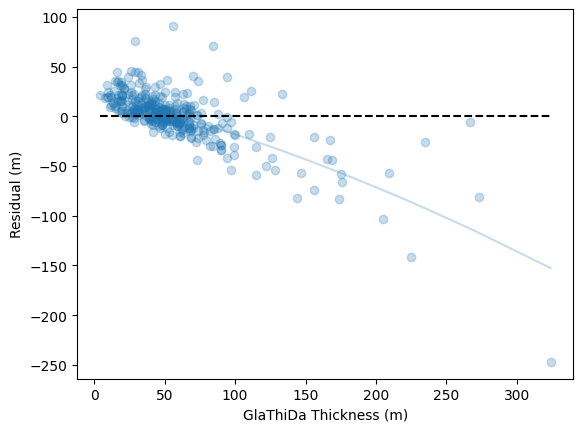

In [62]:
df = df.sort_values('Thickness')
x = df['Thickness']
y1 = (df['F Residual'])
y2 = (df['Residual'])
y3 = np.log(np.exp(y2))

model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(x, y3, 2))
polyline = x
# ax.plot(polyline, model(polyline), alpha = 0.5)

# plt.scatter(
#     x,
#     y1,
#     label = 'Farinotti Residual',
#     alpha = 0.25
# )

plt.scatter(
    x,y2,
    label = 'Residual',
    alpha = 0.25
)
# plt.plot(x,model1(polyline),alpha = 0.25,label = 'FR Curve')
plt.plot(x,model2(polyline),alpha = 0.25,)
plt.plot(
    (x.min(),x.max()),
    (0,0),
    c = 'k',
    linestyle = '--'
)
# plt.plot(x,model3(polyline),alpha = 0.25)
plt.ylabel('Residual (m)')
plt.xlabel('GlaThiDa Thickness (m)')
# plt.yscale("log")
# plt.title('Estimate Residuals')
# plt.legend()
plt.show()




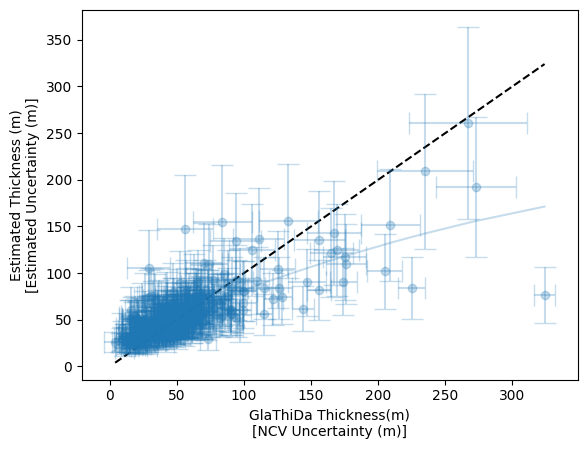

In [200]:

x = df['Thickness']
# x = np.linspace(df['Thickness'].min(),df['Thickness'].max(),341)
polyline = x
y = df['WT1'] 
y1 = df['WT1'] + df['WRC1']
y2 = (df['WT1'] - df['Thickness'])
model1 = np.poly1d(np.polyfit(x, y, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model_ = np.poly1d(np.polyfit(x, x, 2))
plt.plot(
    x,model_(x),
    c = 'k',
    linestyle = '--',
#     label = 'Perfect Estimate',
    alpha = 1
)

# plt.plot(
#     (x.min(),x.max()),
#     (0,0),
#     c = 'k',
#     linestyle = '--',
# #     label = 'Perfect Estimate',
#     alpha = 1
# )

# plt.errorbar(x, y, xerr = yr, linestyle='None', 
#              marker='o', markerfacecolor = 'k', markersize = 15, 
#              ecolor = 'b', color = 'k', linewidth = 10, capsize = 20.5, capthick = 3
#             )

# plt.plot(x,(model2(x)),alpha =.25,
#         color = '#ff7f0e')
plt.plot(x,model1(x),alpha =.25,color = '#1f77b4')

# plt.plot(x, model2(x) + model1(x) ,
#          color = 'red',alpha =1,
#          label = 'Residual Corrected Estimate\nRCE = $\hat{\mu}(x) + \hat{R}(x)$')
# plt.plot(x, model2(x) + model1(x)- 
#          ( model2(x) + model1(x) - model_(x)) ,alpha =1,
#          label = 'Residual Perfected Estimate\nRPE = RCE - (RCE + x)')

# plt.errorbar(
#     x,
#     y,
#     yerr = df['WEU1'],
#     xerr = df['WB1'],
#     alpha = 0.25,
# #     label = 'Estimates $\hat{\mu}(x)$',
#     linestyle = 'None',
#     marker = 'o',
#     capsize = 8
# #     color = 'orange'
# )
plt.errorbar(
    x,
    y,
    yerr = df['WEU1'],
    xerr = df['WB1'],
    alpha = 0.25,
#     label = 'Estimates $\hat{\mu}(x)$',
    linestyle = 'None',
    marker = 'o',
    capsize = 8
#     color = 'orange'
)
# plt.errorbar(
#     x,
#     y,
#     yerr = np.sqrt(df['WEU1']**2 + df['WB1']**2),
#     alpha = 0.25,
#     color = '#1f77b4',
# #     label = 'Estimates $\hat{\mu}(x)$',
#     linestyle = 'None',
#     capsize = 8
# #     marker = 'o',
# #     color = 'orange'
# )
# plt.errorbar(x, y, xerr = yr, linestyle='None', 
#              marker='o', markerfacecolor = 'k', markersize = 15, 
#              ecolor = 'b', color = 'k', linewidth = 10, capsize = 20.5, capthick = 3
#             )

# plt.errorbar(
#     x,y2,
# #     yerr = np.sqrt(df['WEU1']**2 + df['WB1']**2),

#     alpha = 0.25,linestyle = 'None',marker = 'o',
#     label = 'Residuals\n$\hat{R}(x) = |\hat{\mu}(x) - x|$'
# )
# plt.scatter(
#     x,
#     y2,
#     alpha = 0.5,
#     label = 'Corrected Thickness (m)'
# )
# plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('GlaThiDa Thickness(m)\n[NCV Uncertainty (m)]')
plt.ylabel('Estimated Thickness (m)\n[Estimated Uncertainty (m)]')
plt.show()

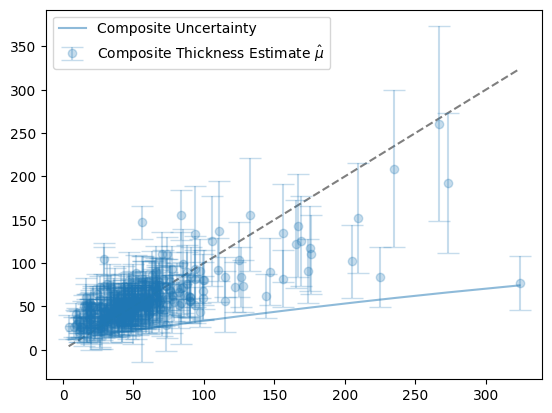

In [231]:
df = df.sort_values('Thickness')
x = df['Thickness']
y1 = df['WEU1']
y2 = df['WB1']
y3 = np.sqrt(df['WEU1']**2+df['WB1']**2)
y4 = df['WT1']
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(x, y3, 2))
model4 = np.poly1d(np.polyfit(x, y4, 2))

plt.plot((x.min(),x.max()),(x.min(),x.max()),alpha = 0.5,color = 'k',linestyle = '--')
# plt.plot(x,model1(x),alpha = 0.5)
# plt.plot(x,model2(x),alpha = 0.5)
plt.plot(x,model3(x),alpha = 0.5,label = 'Composite Uncertainty')
# plt.plot(x,model4(x),alpha = 0.5)

# plt.scatter(
#     x,
#     y1,alpha = 0.25
# )
# plt.scatter(
#     x,
#     y2,alpha = 0.25
# )
# plt.scatter(
#     x,
#     y3,alpha = 0.25,label = 'Composite Uncertainty $\hat{\sigma}$'
# )

# plt.scatter(
#     x,
#     y4,
#     alpha = 0.25,label = 'Composite Thickness Estimate $\hat{\mu}$'
# )
plt.errorbar(
    x,
    y,
    yerr = np.sqrt(df['WEU1']**2 + df['WB1']**2),
    alpha = 0.25,
#     label = 'Estimates $\hat{\mu}(x)$',
    linestyle = 'None',
    marker = 'o',
    capsize = 8,
    color = '#1f77b4',
    label = 'Composite Thickness Estimate $\hat{\mu}$'
)
plt.legend()


Text(0.5, 0, 'Estimated Thickness $\\hat{\\mu}$ (m)')

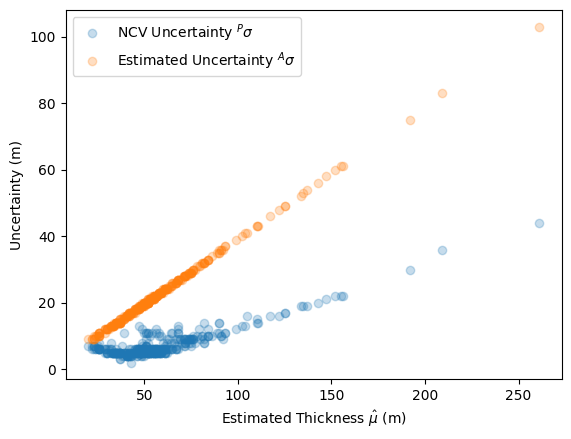

In [247]:
x = df['WT1']
plt.scatter(
    x,
    df['WB1'],alpha = 0.25,label = 'NCV Uncertainty ${}^{P}_{}\sigma$'
)
plt.scatter(
    x,
    df['WEU1'],alpha = 0.25,label = 'Estimated Uncertainty ${}^{A}_{}\sigma$'
)
# plt.xscale('log')
plt.legend()
plt.ylabel('Uncertainty (m)')
plt.xlabel('Estimated Thickness $\hat{\mu}$ (m)')

In [ ]:
df

In [ ]:
df = df.sort_values('Thickness')

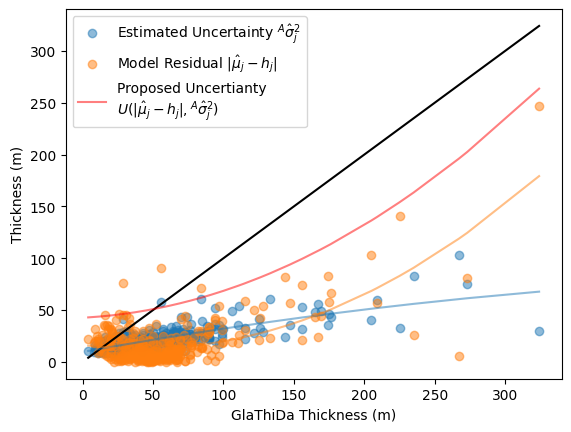

In [47]:
fig, ax = plt.subplots()

ax.plot(
    (x.min(),x.max()),
    (x.min(),x.max()),
    c = 'k'
)
x = df['Thickness']
polyline = x
y = df['WT1'] 
y1 = df['WEU1']
y2 = abs((df['WT1'] - df['Thickness']))
y3 = (y2) + y1 + 16.5834
model1 = np.poly1d(np.polyfit(x, y1, 2))
model2 = np.poly1d(np.polyfit(x, y2, 2))
model3 = np.poly1d(np.polyfit(x, y3, 2))
# model3 = np.poly1d(np.polyfit(x, y1+y2,2))
# ax.scatter(
#     x,
#     y,
#     alpha = 0.5,
#     label = 'Estimated Thickness $\mu_j$'
# )

ax.scatter(
    x,
    y1,
#     c = 'orange',
    alpha = 0.5,
    label = 'Estimated Uncertainty ${}^{A}_{}\hat{\sigma}^{2}_{j}$ '
)
ax.plot(x,model1(polyline),alpha = 0.5,)
# # # # ax = ax.twinx()
ax.scatter(
    x,
    y2,
    alpha = 0.5,
#     c = 'green',
    label = 'Model Residual $|\hat{\mu}_j - h_j|$'
)
ax.plot(x,model2(polyline),alpha = 0.5,
#         c = 'green'
       )
plt.plot(
    x,
    (model3(x)),
    alpha = 0.5,
    c = 'red',
    label = 'Proposed Uncertianty\n' +
    '$U(|\hat{\mu}_j - h_j|, {}^{A}_{}\hat{\sigma}^{2}_{j} )$'
)

plt.legend()
ax.legend()
plt.xlabel('GlaThiDa Thickness (m)')
plt.ylabel('Thickness (m)')
save_title = 'unc_curve' + str(4)
plt.savefig(f'img/img_{save_title}.png', 
    transparent = False,  
    facecolor = 'white'
   )
# plt.show()

In [ ]:
import imageio

In [ ]:
frames = []

for k in range(1,5,1):
    p = str(k)
    save_title = 'unc_curve' + p
    image = imageio.v2.imread(f'img/img_{save_title}.png')
    frames.append(image)
imageio.mimsave('unc_curve.gif', # output gif
            frames,          # array of input frames
            duration = 3000,
            loop = 10
           )   

In [ ]:
model1

In [ ]:
model2

In [ ]:
model3 = np.poly1d(np.convolve(model1,model2))

In [ ]:
model3

In [ ]:
df = gl.load_notebook_data(
    parameterization = '4',loss = 'first'
#     pth = '/data/fast1/glacierml/data/'
)
df

In [ ]:

plt.scatter(
    df['WT1'],
    np.sqrt(df['WEU1']**2 + df['WB1']**2)
)
plt.scatter(
    df['WT1'],
    np.sqrt(model3(df['WT1'])**2 + df['WEU1']**2 + df['WB1']**2)
)
plt.yscale('log')
# plt.xscale('log')

In [ ]:
df = df.sort_values('Thickness')
df = df.reset_index()
df = df.drop('index', axis = 1)
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].scatter(df.index,df['FMT'],alpha = 0.5,label = 'Farinotti Estimates')
ax[0].scatter(df.index,df['WT1'],alpha = 0.5,label = 'This Study Estimates')
ax[0].scatter(df.index,df['Thickness'],alpha = 0.5,label = 'GlaThiDa Thickness')

# ax[10.set_yscale('log')
ax[0].legend()
# ax[0].set_ylabel('Thickness')
# ax[0].set_xlabel('Glacier')


ax[1].scatter(df.index,df['FMT'],alpha = 0.5,label = 'Farinotti Estimates')
ax[1].scatter(df.index,df['WT1'],alpha = 0.5,label = 'This Study Estimates')
ax[1].scatter(df.index,df['Thickness'],alpha = 0.5,label = 'GlaThiDa Thickness')
model3(df['WT1'])**2
ax[1].set_yscale('log')
ax[1].legend()
# ax[1].set_ylabel('Thickness')
# ax[1].set_xlabel('Glacier')
fig.supxlabel('Glacier')
fig.supylabel('Thickness',x = 0.067)
plt.show()